# 1. Author

Student Name: Andrew Porter


Student ID: 220999027

# 2. Problem Formulation

This research utilises the MLEnd Yummy Dataset to create an unsupervised learning model that offers personalized food recommendations to the users, thereby enriching their culinary experience. By specifying a preferred dish, the model suggests dishes that are similar to their favorites based on features like cuisine, diet, and ingredients. It clusters and identifies dishes that share similarities with the user's favorite dish using a combination of KMeans clustering and cosine similarity. This approach ensures that the recommended dishes are closely related to the user's preferences, allowing them to discover new dishes they're likely to enjoy and expand their culinary horizons. This model could also form the basis of a retail customer recommendation system to increase revenue.

# 3. Pipeline


1. Transformation Stage


  *   Data Cleaning: Removal of null value entries and duplicate entries from dataset.
  *   Feature Extraction:  
        - Encoding categorical variables (label encoding for  "Diet" and "Cuisine").
        - Tokenizing the Ingredients column
        - Creating a feature matrix by combining the encoded categorical variables and tokenized ingredients.
    
  * Standardization


2. Modeling Stage:

*   Creation of the model (KMeans clustering and cosine similarity function, used collectively)
*   Initial training and testing of model (primarily using an elbow-test and silhouette scores).
* Retrain



3. Evaluation Stage:
*   Evaluate Metrics
*   Cluster Visualisation

# 4. Transformation Stage

1. Data Cleaning:

  -   Input: Raw dataset of approximately 3000 food entries from various people.
  -   Output: Cleaned dataset without null values and duplicate food entries (i.e. repeated dishes).
  - We first remove null values ensuring the dataset is free from missing values. Second, is the removal of duplicates (i.e. multiple entries of the same dish, entered by different people). This is done to avoid our model returning the input dish back to the user. It is worth noting that this is still a possibility if the dish is entered under a different name, however, this did not occur during testing (still, an avenue for future modifications).

2. Feature Extraction Stage:
  - Input: Cleaned dataset.
  - Output: Feature matrix for modeling.
  - Steps:
    * Encoding Categorical Variables:
      - Input: Cleaned dataset with Diet and Cuisine in categorical format.
      - Output: Dataset with encoded categorical variables (Diet and Cuisine).
      - Label encoding is applied to categorical variables to convert them into numerical representations, making them suitable for our machine learning model.
     * Tokenizing the Ingredients Column:
          - Input: Text-based Ingredients column
          - Output: Tokenized representation of the Ingredients column.
          - Tokenization breaks down the Ingredients column into individual tokens (words), creating a structured feature space which can be used within our model.
    * Creating a Feature Matrix:
          - Input: Encoded categorical variables and tokenized ingredients.
          - Output: Feature matrix for modeling.
          - The encoded categorical variables and tokenized ingredients are combined to create a comprehensive feature matrix.

3. Standardization
  - Input: Feature matrix
  - Output: Standardized feature matrix, representing the input data for modelling.
  - The features are standardised to ensure compatibility with the KMeans algorithm (in relation to distance metrics, optimisation efficiency and  model assumptions).

# 5. Modelling

Our dish recommendation model processes the inherent structures withinin culinary datasets. It is designed to cater to a wider range of user preferences by considering both broader characteristics and specific ingredient profiles. The model uses a two-step approach consisting of KMeans clustering and cosine similarity to group similar dishes based on categorical features like cuisine and diet as well as ingredient composition.

KMeans clustering is chosen for its effectiveness in unsupervised learning and considers overall similarity in cuisine, diet, and tokenized ingredients to form clusters. On the other hand, cosine similarity focuses on fine-grained similarity based on tokenized ingredient vectors. The model leverages all three features throughout the process, utilizing clustering for global similarity and then cosine similarity for local, ingredient-level similarity.

As users may have different measures of similarity, the combination of both approaches allows for a more nuanced and comprehensive recommendation system, enhancing the diversity and relevance of recommended dishes.

# 6. Methodology

The model is trained using the KMeans clustering algorithm on a preprocessed dataset that includes Cuisine, Diet, and Ingredients as primary features. Categorical features such as Cuisine and Diet are converted into a numerical format using label encoding. The Ingredients column is tokenized to capture individual components of each dish, forming an integral part of the feature space. These 3 features are then combined into our model's feature matrix. The matrix is then standardized  to ensure consistent scales for effective clustering. The KMeans algorithm is employed for clustering, leveraging the entire feature space. Cosine similarity is then incorporated to capture local, ingredient-level similarity within each cluster, complementing the global clustering approach.

The optimal number of clusters is determined through a consideration of the elbow method and silhouette scores. The final model's performance is assessed through a combination of silhouette scores and the Calinski-Harabasz index. We also use Principle Component Analysis to visualize the clusters, providing insights into data distribution and separation within each cluster.
This methodology ensures a holistic training and validation process, capturing both global and local patterns within the dataset.






# 7. Dataset

The dataset employed in this study originates from the 'MLEnd Yummy Dataset'. This dataset encompasses various culinary dishes submitted by Queen Mary University London students. It contains a host of additional features but our features of interest are Diet, Cuisine and Ingredients. You can view the original dataframe below:

In [28]:

from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


 As mentioned prior, to ensure data integrity and model smoothness the initial preprocessing step involves the removal of null entries and duplicate records based on the 'Dish_name' column (see below).

In [29]:
df = df.dropna()
df_no_duplicates = df.drop_duplicates(subset=['Dish_name']).copy()

# Note df_no_duplicates is the final dataframe used for the model

We now extract our features. The encoding of the categorical variables can be seen below.

In [30]:
# Encode categorical variables
label_encoder = LabelEncoder()
df_no_duplicates['Diet_encoded'] = label_encoder.fit_transform(df_no_duplicates['Diet'])
df_no_duplicates['Cuisine_encoded'] = label_encoder.fit_transform(df_no_duplicates['Cuisine'])

df_no_duplicates[['Diet_encoded', 'Cuisine_encoded']]

,Diet_encoded,Cuisine_encoded
filename,,
000001.jpg,0,60
000002.jpg,0,32
000003.jpg,0,22
000004.jpg,2,49
000005.jpg,0,49
...,...,...
003243.jpg,2,17
003246.jpg,2,49
003247.jpg,2,49


The ingredients column is now tokenized and combined with our additional features, creating our feature matrix.

In [31]:
# Tokenize Ingredients column
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b,?')
X_ingredients = vectorizer.fit_transform(df_no_duplicates['Ingredients']).toarray()

# Combine features and tokenized Ingredients
X_combined = df_no_duplicates[['Cuisine_encoded', 'Diet_encoded']]
X_combined = np.hstack((X_combined.values, X_ingredients))

X_combined

array([[60,  0,  0, ...,  0,  0,  0],
       [32,  0,  0, ...,  0,  0,  0],
       [22,  0,  0, ...,  0,  0,  0],
       ...,
       [49,  2,  0, ...,  0,  0,  0],
       [49,  1,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0,  0,  0]])

Our final step before the construction of our model is to standardise our feature matrix:

In [32]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# 8. Results

After transforming our data into the desired format, we can now construct our model. We first implement our model with a random number of clusters so the model functionality and output can be observed. In the second block of code we employ the elbow method to determine the optimal number of clusters for our model. This concept attempts to find the value of k that beyond which does not significantly reduce the intra-cluster sample scatter. Alongside this we plot silhouette scores for different values of k. We use these two visualisations in tandem to determine the optimal number of clusters. We then tune the model using the optimal hyperparameter and discuss the results.

In [33]:

# Apply KMeans clustering
num_clusters = 5  # Chosen by chance
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)  # n_init set to remove 'default' information message
df_no_duplicates['Cluster'] = kmeans.fit_predict(X_scaled)

# Function to get similar dishes for a given dish using cosine similarity
def get_similar_dishes_cosine(dish_id, num_similar=5):
    cluster_label = df_no_duplicates.loc[df_no_duplicates['Dish_name'] == dish_id, 'Cluster'].values[0]

    # Calculates cosine similarity between the dish and all other dishes in the same cluster
    similarities = cosine_similarity(X_scaled[df_no_duplicates['Cluster'] == cluster_label],
                                     X_scaled[df_no_duplicates['Dish_name'] == dish_id])

    # Gets the indices of most similar dishes (excluding the dish itself)
    similar_indices = np.argsort(similarities[:, 0])[::-1][:num_similar+1]

    # Excludes the dish itself from the recommendations
    similar_indices = similar_indices[similar_indices != 0]

    # Gets the Dish_names of similar dishes
    similar_dishes = df_no_duplicates[df_no_duplicates['Cluster'] == cluster_label].iloc[similar_indices]['Dish_name'].tolist()

    # Filters out duplicate dish names
    similar_dishes = list(set(similar_dishes))

    return similar_dishes

# Get similar dishes
example_dish = 'chicken_curry'
similar_dishes_cosine = get_similar_dishes_cosine(example_dish)

print(f"Similar dishes for '{example_dish}': {', '.join(similar_dishes_cosine)}")


Similar dishes for 'chicken_curry': mansaf, lentils_and_rice, potato_stuffed_paratha, roti_and_dal, potato_cabbage_curry, chicken_curry


### Elbow Method:

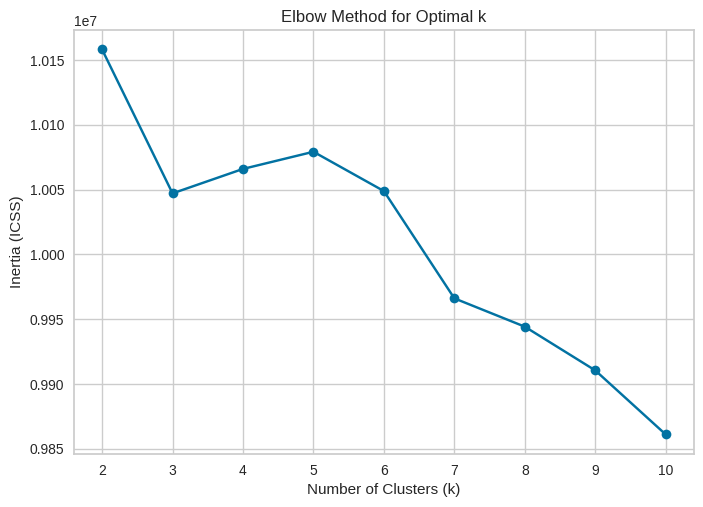

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder


k_values = range(2, 11)

# Initializes a list to store ICSS (Inertia or Sum of Squared Distances) for each k
icss_values = []

for k in k_values:
    # Applys clustering (KMeans) on the whole dataset for the current k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    # Calculate ICSS (Inertia or Sum of Squared Distances)
    icss = kmeans.inertia_
    icss_values.append(icss)

plt.plot(k_values, icss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (ICSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


The underlying assumption of the elbow method is that ICSS should continously decrease as the clusters increase. Strangely, our plot seems to show an increase from 3 to 4. It could be due to the specific characteristics of the data. It's possible that the nature of the features don't lend themselves well to a clear elbow, or there might be inherent complexity that isn't captured well by the inertia metric alone. Regardless, the value of 3 is clearly where the ICSS starts decreasing less (the opposite in fact). The ambiguity of this visualisation places added importance on our next visualisation, the silhouette scores.

### Silhouette Scores:

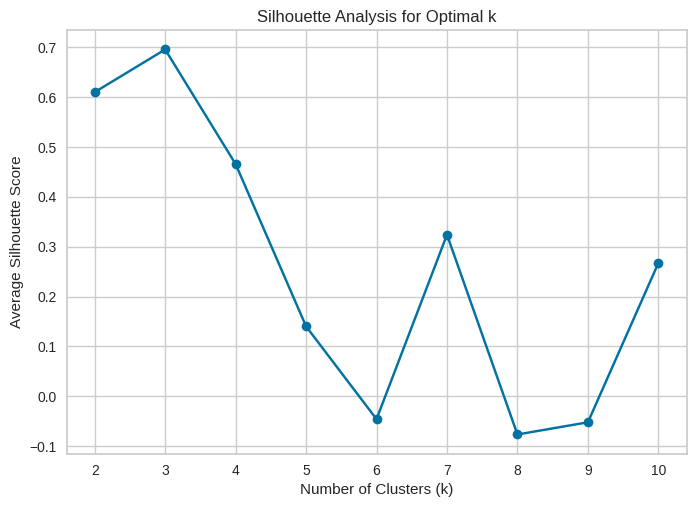

In [35]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Defines a range of k values to test
k_values = range(2, 11)

silhouette_scores = []

for k in k_values:
    # Apply clustering (KMeans) on the whole dataset for the current k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    # Evaluate the model on the entire dataset
    silhouette = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()


This is a much simpler interpretation. We can see that the average silhouette score for 3 clusters is the largest by a significant amount. A score of 0.7 suggests cohesive and well-defined clusters at this value.

### Tuned Model:

We now implement the model using a k value of 3. We also run the model for a value of 4 to compare the Caliski Harabasz Index.

In [36]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Apply KMeans clustering
num_clusters = 3  # Adjusted k
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_no_duplicates['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df_no_duplicates['Cluster'])
print(f'Silhouette Score (K=3): {silhouette_avg}')

# Calculate Calinski-Harabasz Index
chi_score = calinski_harabasz_score(X_scaled, df_no_duplicates['Cluster'])
print(f'Calinski-Harabasz Index (K=3): {chi_score}')

# Function to get similar dishes for a given dish using cosine similarity
def get_similar_dishes_cosine(dish_id, num_similar=5):
    cluster_label = df_no_duplicates.loc[df_no_duplicates['Dish_name'] == dish_id, 'Cluster'].values[0]

    # Calculates cosine similarity between the dish and all other dishes in the same cluster
    similarities = cosine_similarity(X_scaled[df_no_duplicates['Cluster'] == cluster_label],
                                     X_scaled[df_no_duplicates['Dish_name'] == dish_id])

    # Gets the indices of most similar dishes (excluding the dish itself)
    similar_indices = np.argsort(similarities[:, 0])[::-1][:num_similar+1]

    # Excludes the dish itself from the recommendations
    similar_indices = similar_indices[similar_indices != 0]

    # Gets the Dish_names of similar dishes
    similar_dishes = df_no_duplicates[df_no_duplicates['Cluster'] == cluster_label].iloc[similar_indices]['Dish_name'].tolist()

    # Filters out duplicate dish names
    similar_dishes = list(set(similar_dishes))

    return similar_dishes

# Gets similar dishes for 'chicken_katsu_rice'
example_dish = 'chicken_katsu_rice'
similar_dishes_cosine = get_similar_dishes_cosine(example_dish)

print(f"Similar dishes for '{example_dish}': {', '.join(similar_dishes_cosine)}")


Silhouette Score (K=3): 0.6956196104187019
Calinski-Harabasz Index (K=3): 19.35216388149175
Similar dishes for 'chicken_katsu_rice': grilled_chicken_strips_and_chips, chicken_breast_steak, chicken_tikka_with_salad, chineese_curry, chicken_breast_with_garlic_bread


In [37]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Apply KMeans clustering
num_clusters = 4  # Adjusted k
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_no_duplicates['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df_no_duplicates['Cluster'])
print(f'Silhouette Score (K=4): {silhouette_avg}')

# Calculate Calinski-Harabasz Index
chi_score = calinski_harabasz_score(X_scaled, df_no_duplicates['Cluster'])
print(f'Calinski-Harabasz Index (K=4): {chi_score}')


Silhouette Score (K=4): 0.46573889871949165
Calinski-Harabasz Index (K=4): 11.252787229141827


### Results Discussion:

The silhouette score and the elbow method (majorly silhouette) indicate strong performance in clustering into 3 groups. A high silhouette value of 0.7 indicates cohesive and well-defined clusters, however, there is a steep continued decline in performance past this point. This decline is shared by Calinski-Harabasz index value. A drop in this value suggests that increasing the number of clusters causes the data points to become either more spread out within clusters or less spread out between. Ultimately, these results suggest that our model is only able to separate the data into three distinct groups effectively.

This issue may stem from the selected features. It's possible that the current set of features is not capturing the underlying structure of the data well enough to support four or more clusters. Furthermore, some features may hold little discriminatory power in distinguishing between groups (i.e. there is minimal variation between classes).

In terms of our model's goal (food recommendation), this outcome would typically be a cause for concern, that is if we solely relied on KMean clustering to make our recommendations. Luckily, this is not the case. The cosine similarity component has become even more crucial, without it the recommendation model would offer much less specific recommendations. The incorporation of this component allows us to capture an improved degree of detailed similarity information than the limited clustering alone would allow.

Below we have plotted the clusters in a two dimensional feature space to gain further insight.


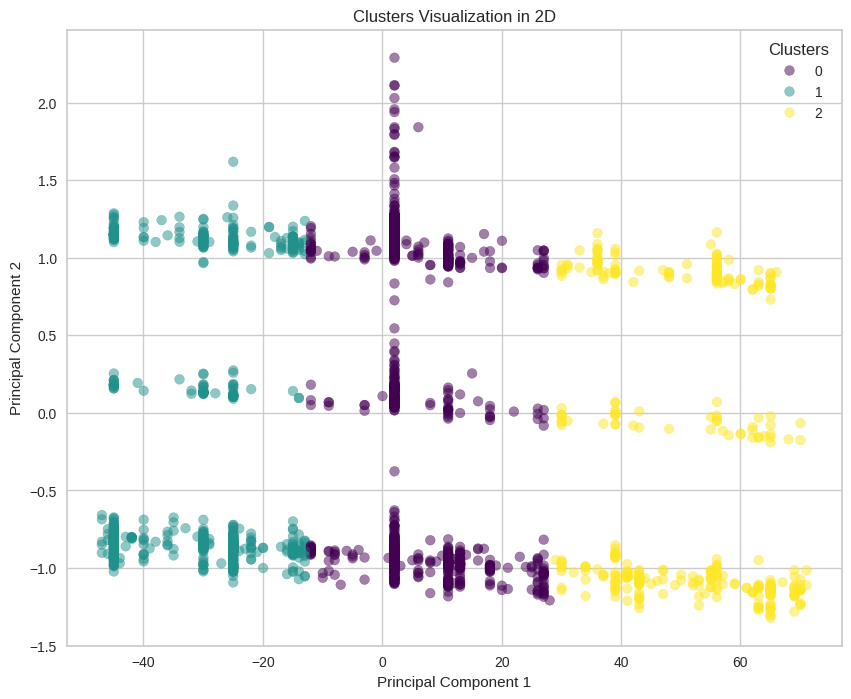

In [38]:
from sklearn.decomposition import PCA
# Applys PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

# Applys clustering (KMeans) on the reduced data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_combined)

# Visualizes clusters in 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clusters Visualization in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()


The three clusters are exhibited above. Some data points from opposing clusters appear to be particularly close together, with some overlapping, this is suggestive of potential ambiguity in the boundary between clusters. Although, it is worth noting that this visualisation is a simplification, therefore the boundary may only appear ambiguous in the reduced feature space.

## 9. Conclusions

The model has shown promising results in distinguishing between three distinct classes, but struggles when it comes to higher numbers of clusters. Due to this, the model would likely perform inadequately without the cosine similarity component. The clustering suggests that the model's features may not be sufficiently complex to support more nuanced groupings. It is worth noting that the healthiness rating component was considered, but it's subjective nature worsened performance. Therefore, future modifications could involve including new, more powerful features within the data or exploring alternative representations of existing features (placing emhpasis on discriminatory power).

The dataset itself presented several challenges, such as entries with only one instance (e.g. cuisines using 'slang' terminology, raising an information loss/model performance dilemma), potential data entry errors, and inconsistencies in feature formatting, which may have impacted the model's performance. Therefore, future iterations should focus on improving the dataset's quality by standardizing entries, addressing spelling mistakes, and expanding the dataset to capture more underlying patterns.

In addition, exploring different clustering techniques such as Hierarchical clustering or DBSCAN could also offer improved performance and could be an avenue for further research.

In summary, while the model has laid a foundation, there is room for improvement, and future modifications should be guided by a commitment to improving the dataset's quality and exploring new features and clustering techniques.